# Problem 2 + 3

In [233]:
import numpy as np
from numpy.linalg import inv
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# EX2


In [234]:
data = pd.read_csv('https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_linear.csv')
data 

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418
5,42.0690,625.992
6,44.4828,655.248
7,46.8966,701.377
8,49.3103,748.918
9,51.7241,757.881


In [235]:
data.shape

(30, 2)

In [236]:
data.shape[0] # number of row

30

In [237]:
data.shape[1] # number of columns

2

In [238]:
# Vẽ model dự đoán (đường thẳng) và dữ liệu (point - scatter).
# Dự đoán giá các căn nhà có diện tích 50, 100, 150.

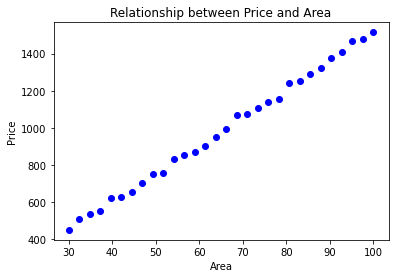

In [239]:
x = np.array(data['Diện tích'])
y = np.array(data['Giá'])
plt.plot(x,y, 'bo')    
# bo: blue circle vs. 'blue' line
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Relationship between Price and Area')
plt.show()

In [240]:
class LinearRegression:
    def __init__(self, data, y_train):
        self.data = data
        self.y_train = y_train
        
    def coefficient(self):
        target = np.array(self.data[self.y_train]).reshape(self.data.shape[0], 1) #rowby1
        features = np.array(self.data.loc[:,self.data.columns != self.y_train]).reshape(self.data.shape[0], self.data.shape[1]-1)
        x = np.concatenate((np.ones((self.data.shape[0],1)), features), axis = 1) #adding column of ones to x
        w = np.array(inv(x.T.dot(x)).dot(x.T).dot(target)).reshape(features.shape[1]+1, 1)
        return w
    
    def add_predict_column(self):
        data1 = self.data.copy()
        features = np.array(self.data.loc[:, self.data.columns != self.y_train]).reshape(self.data.shape[0],self.data.shape[1]-1)
        w = self.coefficient()
        data1['predict'] = features.dot(w[1:,]) + w[0]
        return data1
    
    def mse(self): # residuals
        data1 = self.add_predict_column()
        return round(float(np.mean((data1['predict'] - data1[self.y_train]) ** 2)),5)
    
    def predict_value(self, l):
        array = np.array(l).reshape(1, len(l)) # list of feature
        w = self.coefficient()
        return array.dot(w[1:,]) + w[0]
    
    def model(self):
        w = self.coefficient()
        print('y = ', end = '')
        for i in range(1, len(w)):
            print(round(float(w[i][0]),3), self.data.columns[i-1], '+', end = ' ')
        print(round(float(w[0][0]),3))
        

In [241]:
# # data.shape[0] : số hàng --> 30
# # data.shape[1] : số cột --> 2
# feature = np.array(data.loc[:, data.columns != 'price']).reshape(data.shape[0],data.shape[1] - 1 )
# feature # 30x1
# # feartur ở đây là x, 

In [242]:
data.rename(columns = {'Giá': 'price', 'Diện tích': 'area'}, inplace =True)

In [243]:
ex1 = LinearRegression(data,'price')
ex1.model()

y = 15.211 area + -7.064


In [244]:
print(ex1.predict_value([50]))
print(ex1.predict_value([100]))
print(ex1.predict_value([150]))

[[753.49027134]]
[[1514.04481132]]
[[2274.59935131]]


In [245]:
predict_price = ex1.add_predict_column()
predict_price.head()

,area,price,predict
0,30.0000,448.524,449.268455
1,32.4138,509.248,485.984986
2,34.8276,535.104,522.701517
3,37.2414,551.432,559.418048
4,39.6552,623.418,596.134579


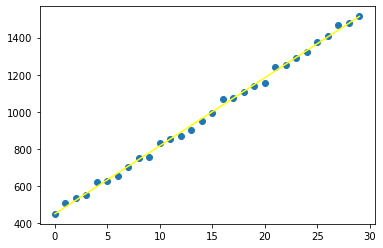

In [246]:
plt.scatter(predict_price.index, predict_price.price)
plt.plot(predict_price['predict'], 'yellow')

In [247]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

house_boston_df = pd.read_csv('housing.csv.xls',header=None, delimiter=r"\s+", names=column_names )
house_boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [248]:
house_boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [249]:
house_boston = LinearRegression(house_boston_df, 'MEDV')
house_boston.model()

y = -0.108 CRIM + 0.046 ZN + 0.021 INDUS + 2.687 CHAS + -17.767 NOX + 3.81 RM + 0.001 AGE + -1.476 DIS + 0.306 RAD + -0.012 TAX + -0.953 PTRATIO + 0.009 B + -0.525 LSTAT + 36.459


In [250]:
house_boston_predict = house_boston.add_predict_column()

In [251]:
house_boston_predict.reset_index(inplace = True)

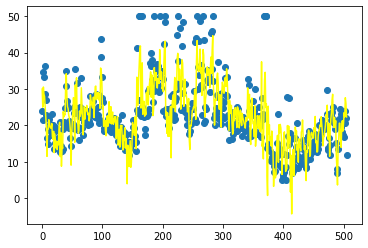

In [252]:
plt.scatter(house_boston_predict.index, house_boston_predict.MEDV)
plt.plot(house_boston_predict.predict,'yellow')

maybe code them phan accurracy
